In [3]:
import sklearn
from sklearn.gaussian_process import GaussianProcessRegressor
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Création de données synthétiques
x = np.linspace(0, 10, 100)
y = np.cos(x) #+ x**2 -20 * np.sin(5 * x) permet de voir les limites du procdessus gaussien 
# Selection de 100 points aléatoires
indices = np.random.choice(range(100), size=20, replace=False)
x_chosen = x[indices]
y_chosen = y[indices]
    

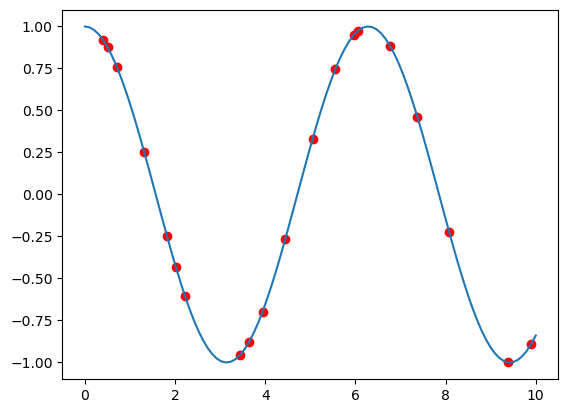

In [3]:
plt.plot(x, y, label='Données originales')
plt.scatter(x_chosen, y_chosen, color='red', label='Points choisis')

In [4]:
# Création et entraînement du modèle de processus gaussien
gaussienProcessRegressor = sklearn.gaussian_process.GaussianProcessRegressor()
gaussienProcessRegressor.fit(x_chosen.reshape(-1, 1), y_chosen.reshape(-1, 1)) # on passe en paramètre les points choisis ainsi que leur image

GaussianProcessRegressor()

In [5]:
y_pred = gaussienProcessRegressor.predict(x.reshape(-1, 1)) # on prédit les images de tous les points

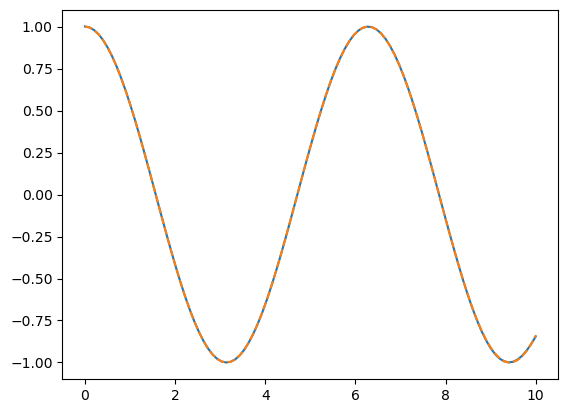

In [6]:
# On affiche les résultats prédits par le modèle
plt.plot(x,y_pred)
plt.plot(x, y, label='Données originales' , linestyle='dashed')
plt.show()

In [7]:
gaussienProcessRegressor.get_params()

{'alpha': 1e-10,
 'copy_X_train': True,
 'kernel': None,
 'n_restarts_optimizer': 0,
 'n_targets': None,
 'normalize_y': False,
 'optimizer': 'fmin_l_bfgs_b',
 'random_state': None}

c:\Users\ZEJLI\anaconda3\envs\Transformers\lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


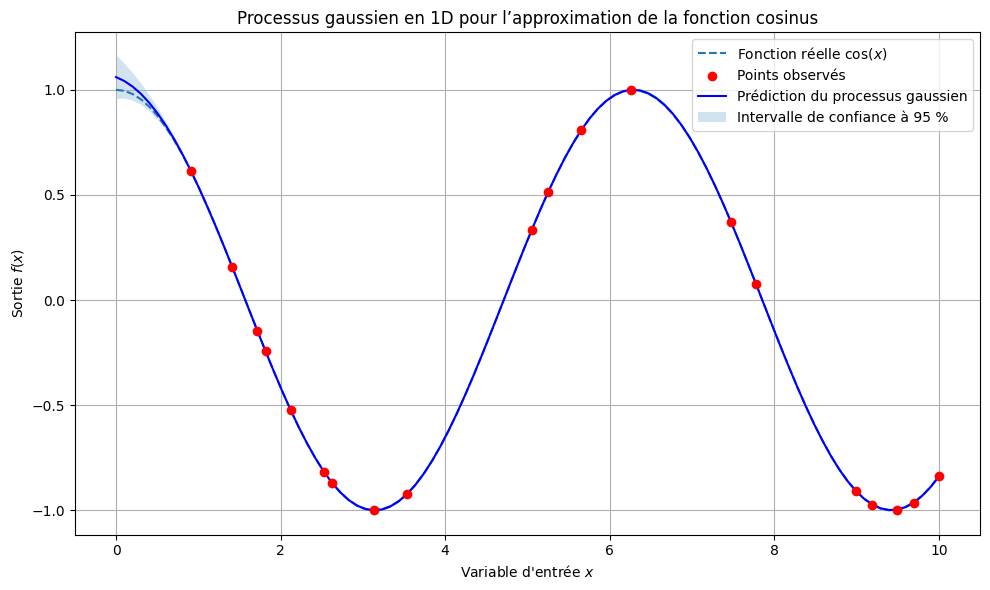

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# -----------------------------
# Génération des données
# -----------------------------
x = np.linspace(0, 10, 100)
y = np.cos(x)

# Sélection de points d'apprentissage
indices = np.random.choice(range(100), size=20, replace=False)
x_chosen = x[indices]
y_chosen = y[indices]

# -----------------------------
# Modèle de processus gaussien
# -----------------------------
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=1e-3)
gp = GaussianProcessRegressor(kernel=kernel)

gp.fit(x_chosen.reshape(-1, 1), y_chosen)

# Prédiction
y_pred, y_std = gp.predict(x.reshape(-1, 1), return_std=True)

# -----------------------------
# Affichage
# -----------------------------
plt.figure(figsize=(10, 6))

# Fonction vraie
plt.plot(x, y, linestyle='dashed', label='Fonction réelle $\\cos(x)$')

# Points observés
plt.scatter(x_chosen, y_chosen, color='red', zorder=5, label='Points observés')

# Prédiction GP
plt.plot(x, y_pred, color='blue', label='Prédiction du processus gaussien')

# Intervalle de confiance
plt.fill_between(
    x,
    y_pred - 2 * y_std,
    y_pred + 2 * y_std,
    alpha=0.2,
    label='Intervalle de confiance à 95 %'
)

# Titres et labels
plt.title("Processus gaussien en 1D pour l’approximation de la fonction cosinus")
plt.xlabel("Variable d'entrée $x$")
plt.ylabel("Sortie $f(x)$")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


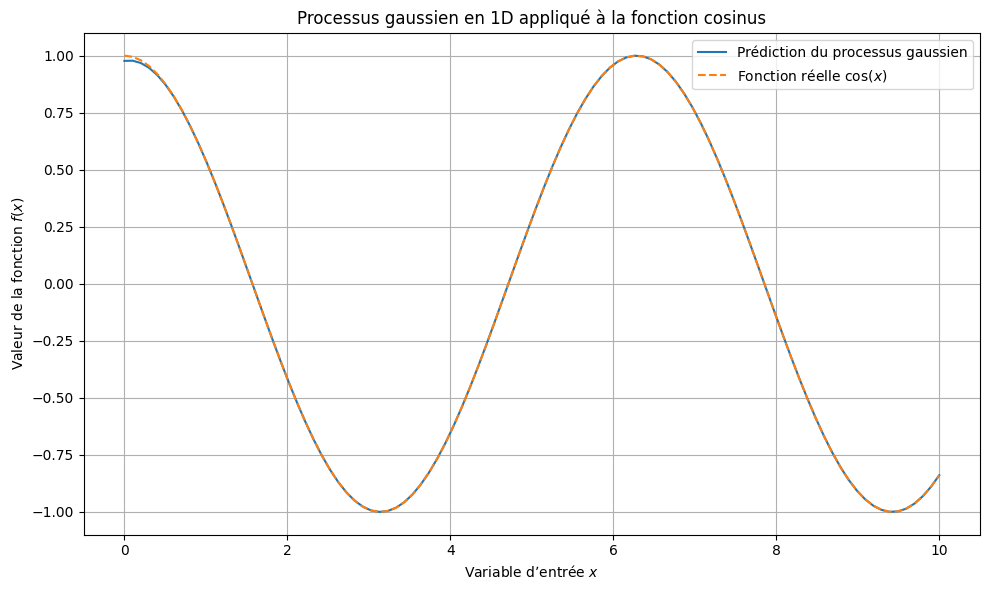

In [4]:
# Création et entraînement du modèle de processus gaussien
gaussienProcessRegressor = sklearn.gaussian_process.GaussianProcessRegressor()
gaussienProcessRegressor.fit(
    x_chosen.reshape(-1, 1),
    y_chosen.reshape(-1, 1)
)

# Prédiction sur l'ensemble des points
y_pred = gaussienProcessRegressor.predict(x.reshape(-1, 1))

# -----------------------------
# Affichage du plot
# -----------------------------
plt.figure(figsize=(10, 6))

# Prédiction du processus gaussien
plt.plot(x, y_pred, label='Prédiction du processus gaussien')

# Fonction réelle
plt.plot(x, y, linestyle='dashed', label='Fonction réelle $\\cos(x)$')

# Titres et axes
plt.title("Processus gaussien en 1D appliqué à la fonction cosinus")
plt.xlabel("Variable d’entrée $x$")
plt.ylabel("Valeur de la fonction $f(x)$")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
